In [14]:
from dataLoader import yfDataLoader

In [30]:
loader = yfDataLoader("AAPL")

calls, puts = loader.get_option_chain()

In [37]:
calls.pivot(index="maturity", columns="forwardMoneyness", values="impliedVolatility")

forwardMoneyness,-0.298432,-0.296897,-0.295790,-0.295198,-0.291148,-0.287903,-0.286420,-0.285353,-0.283832,-0.280573,...,0.290267,0.290965,0.291780,0.292588,0.292595,0.294467,0.295677,0.296638,0.298917,0.299884
maturity,,,,,,,,,,,,,,,,,,,,,
0.005479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.781251,NaN,NaN,NaN,NaN,NaN
0.024658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.625004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.043836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.48438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.060274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.441412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.082192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.101370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.120548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.178082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508184,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.273973,NaN,NaN,NaN,NaN,NaN,0.478277,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302741


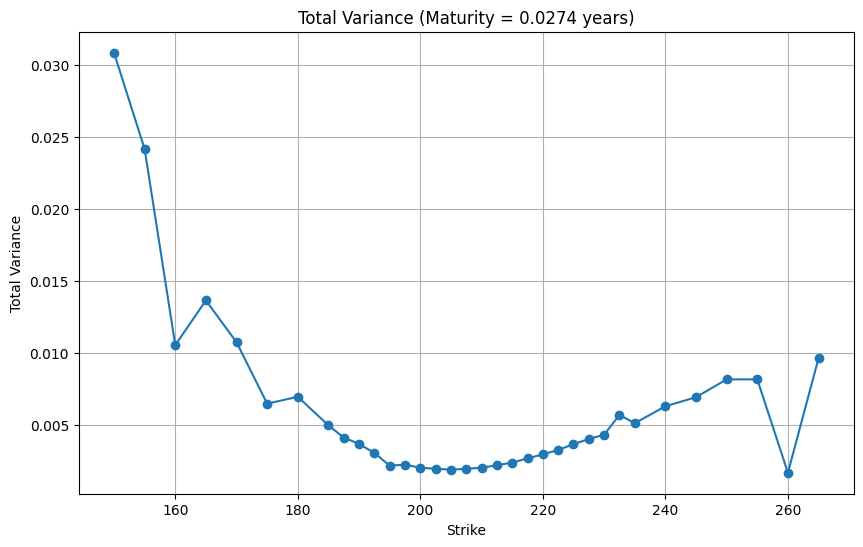

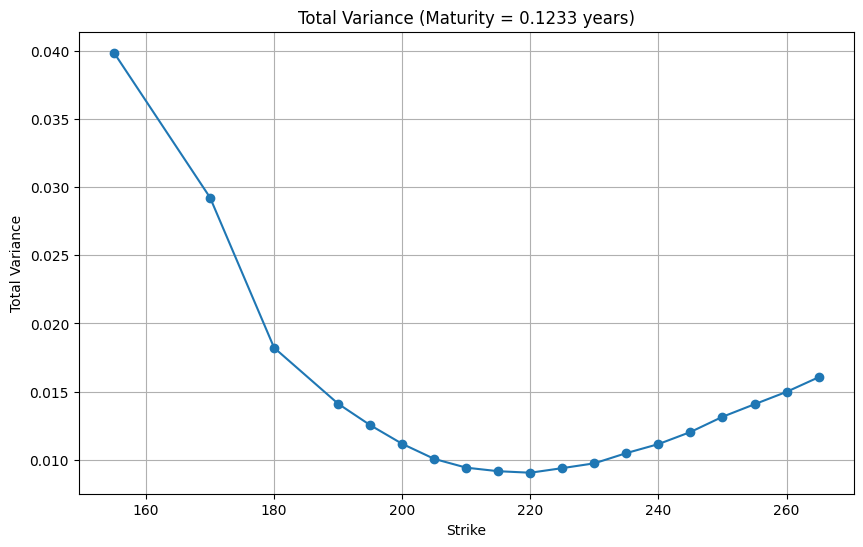

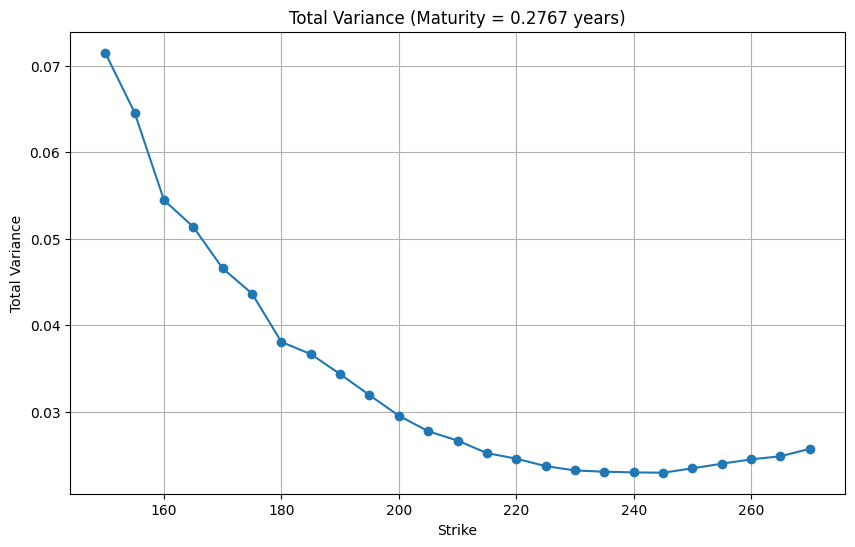

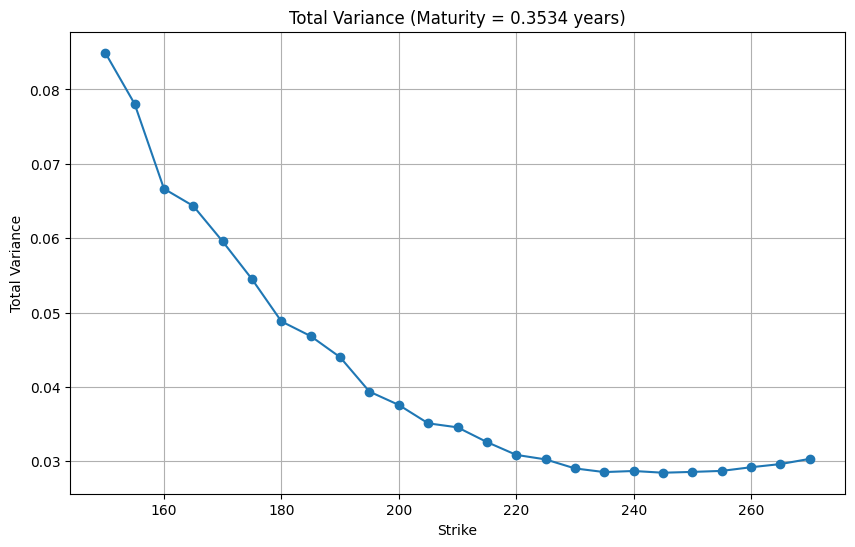

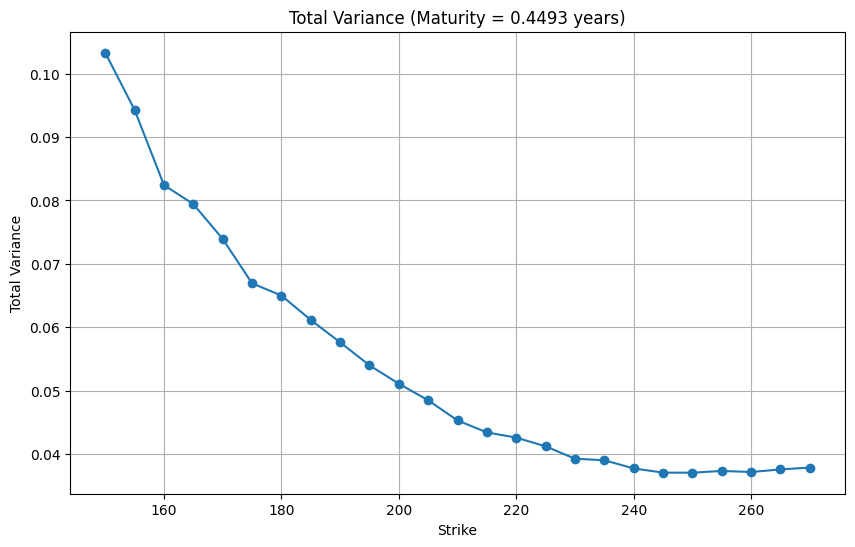

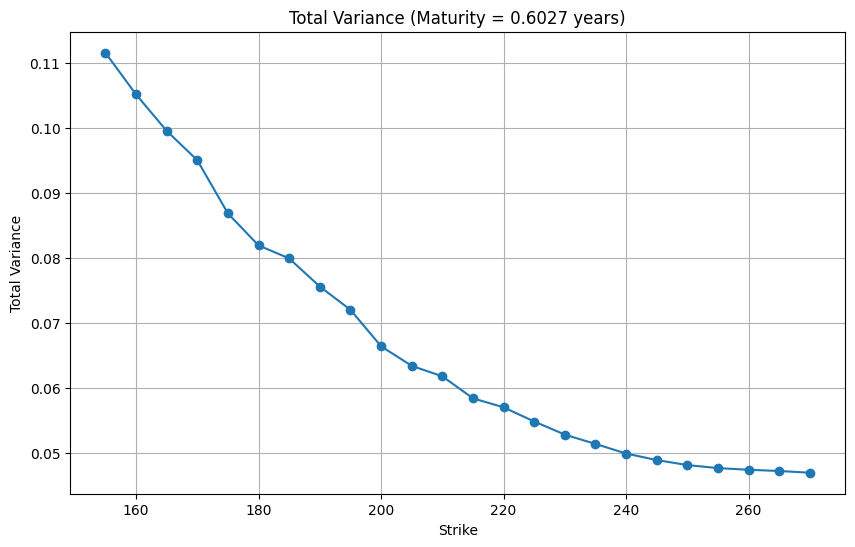

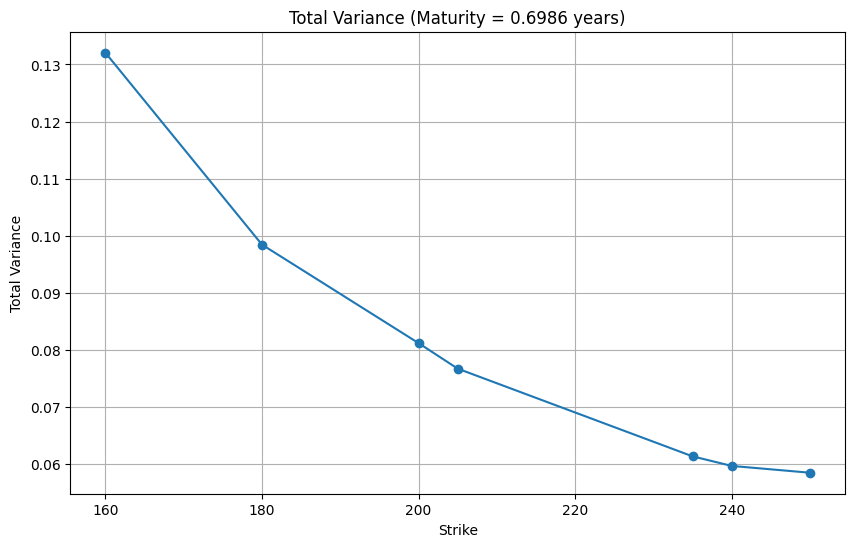

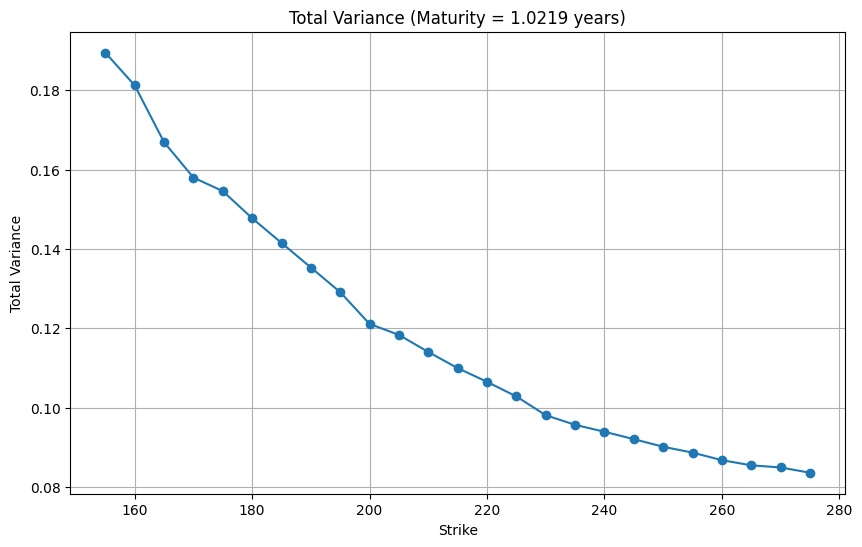

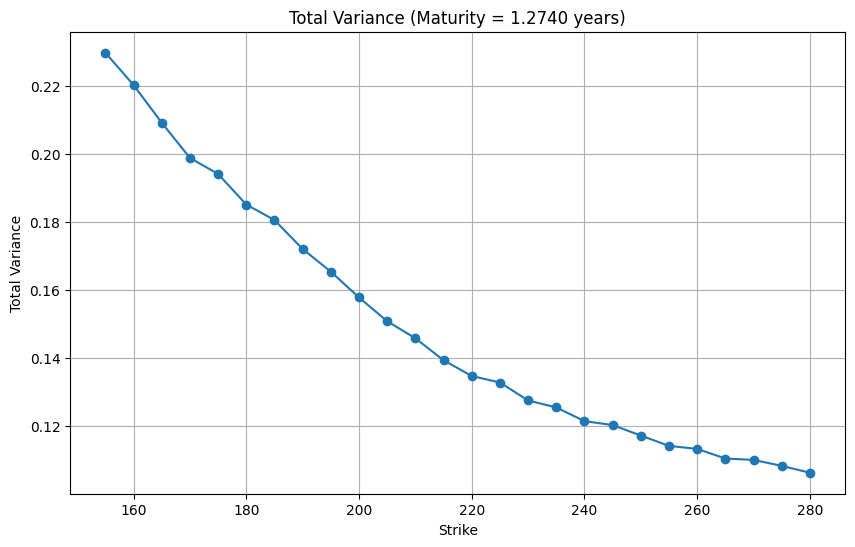

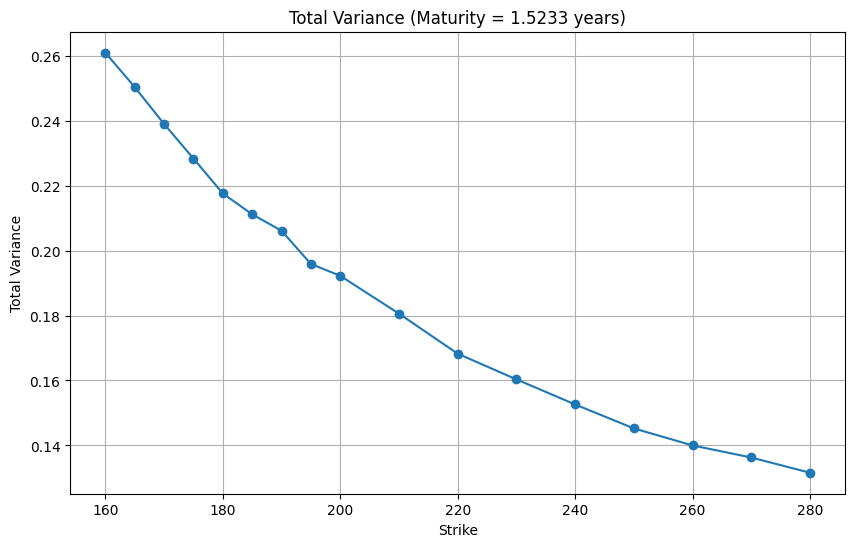

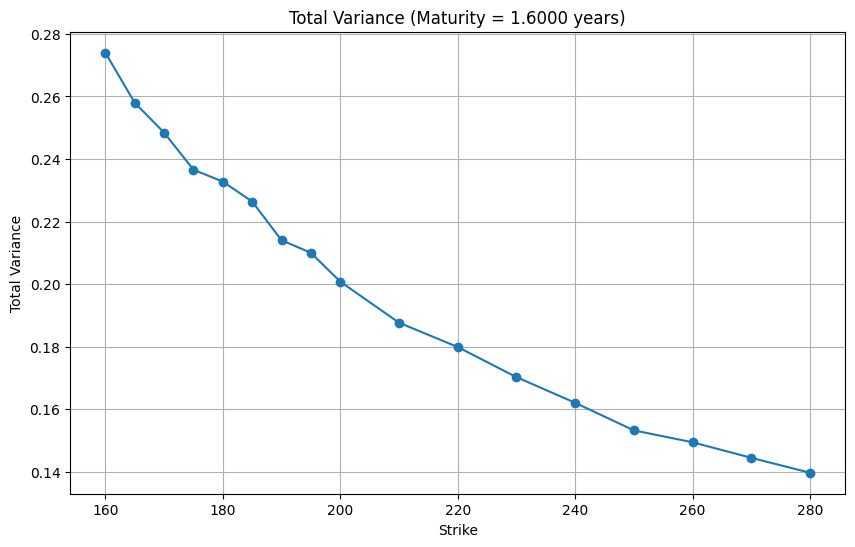

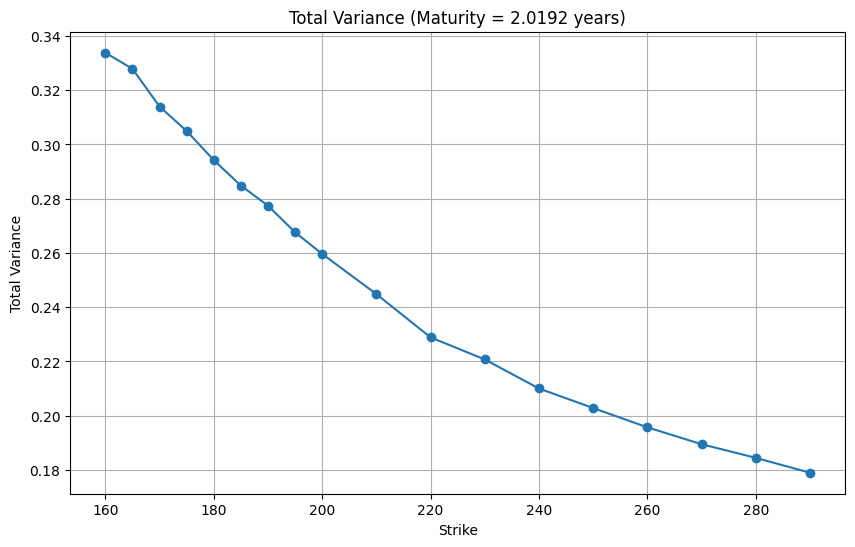

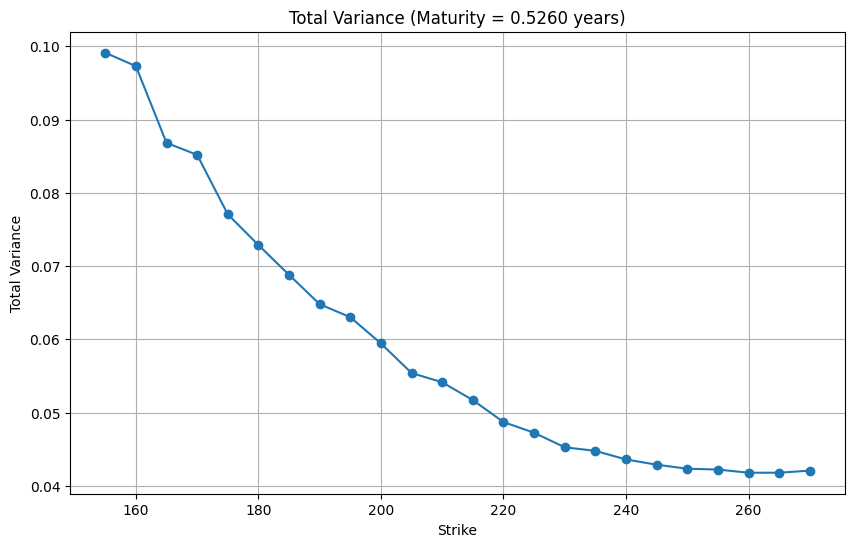

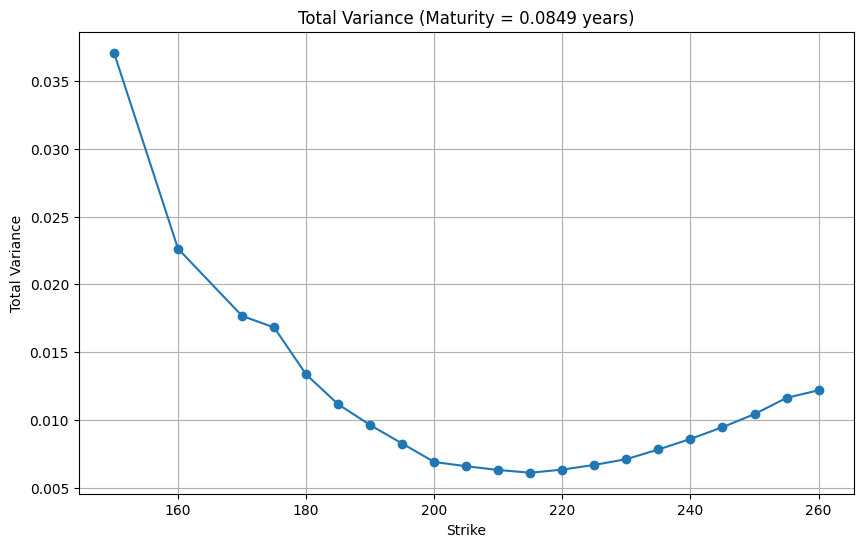

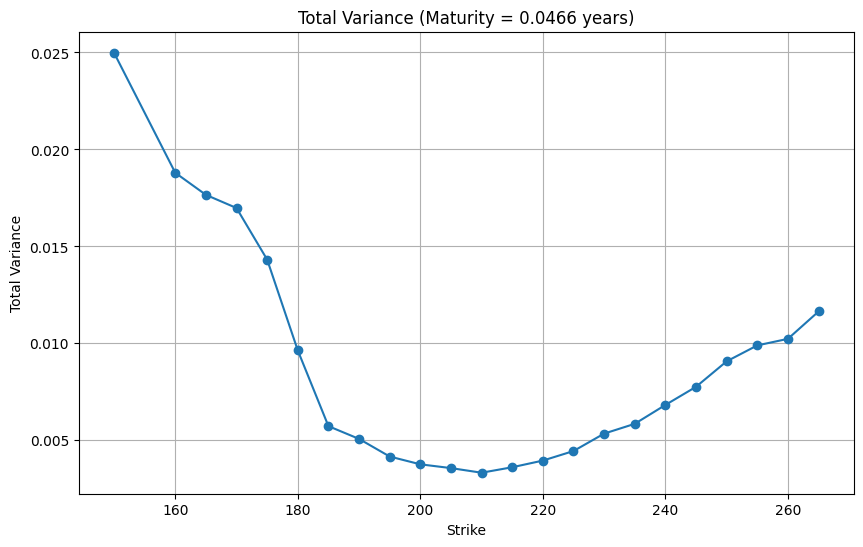

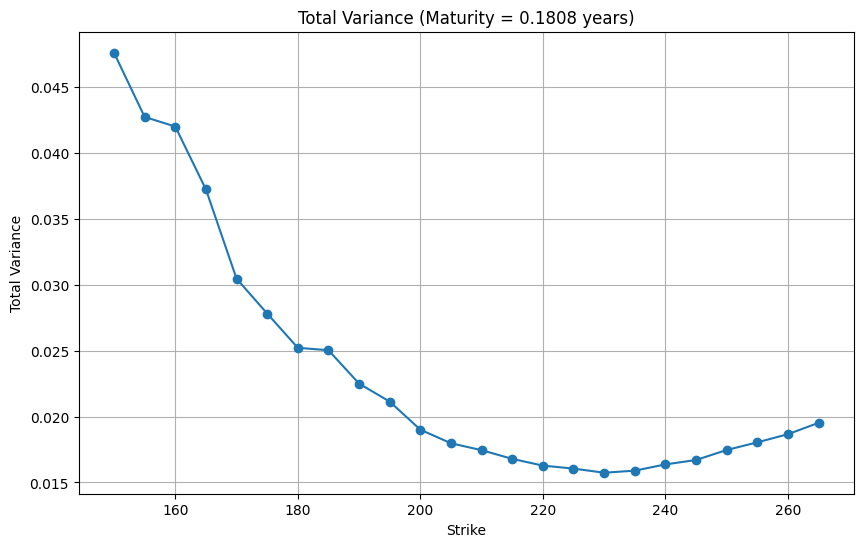

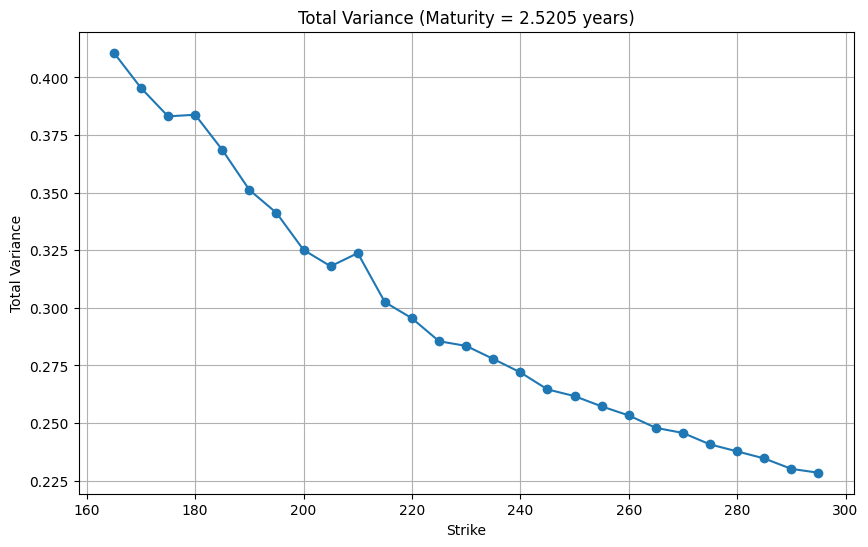

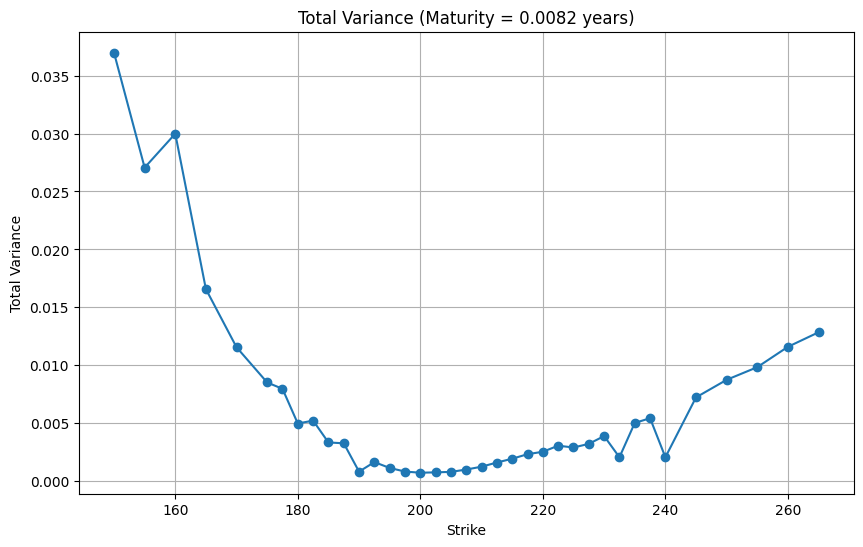

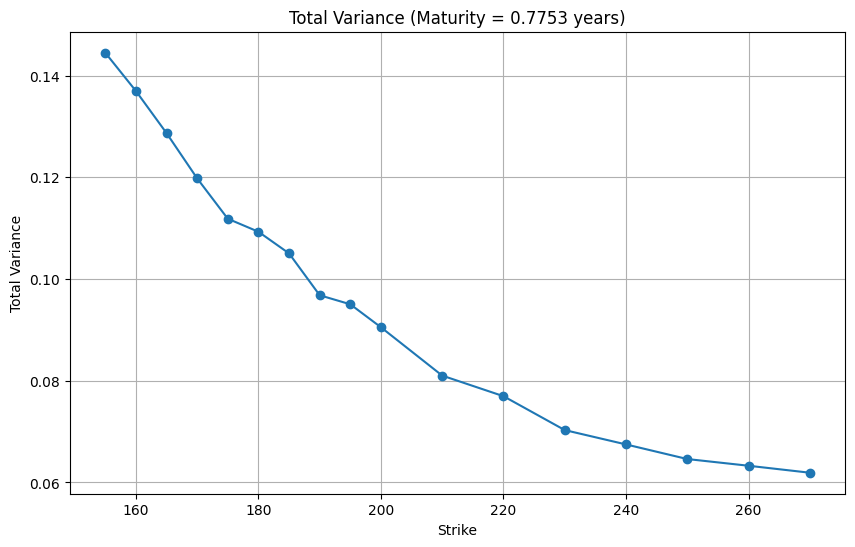

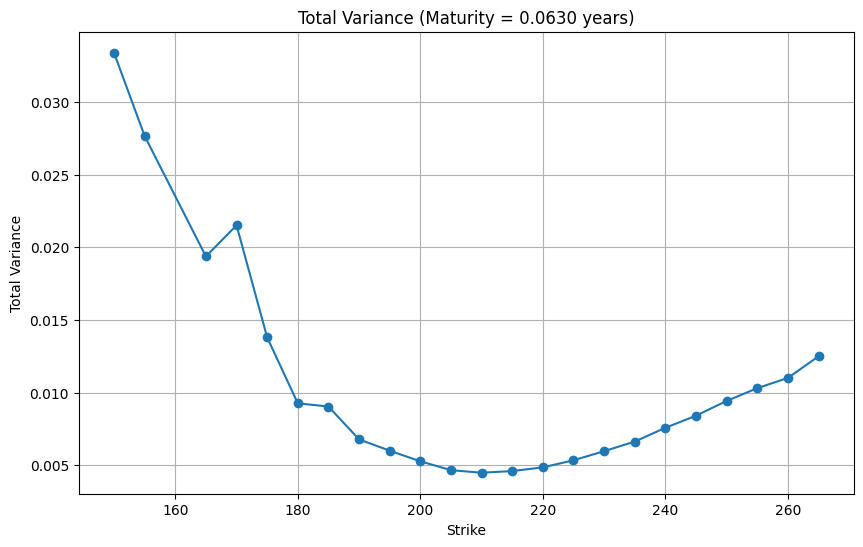

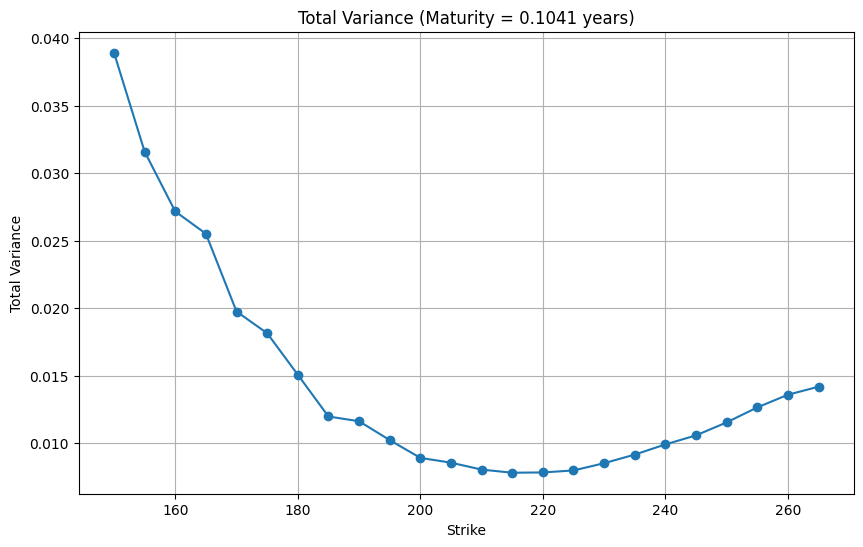

In [16]:
import matplotlib.pyplot as plt
import numpy as np

for target_maturity in set(calls["maturity"]):
    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_calls["strike"], filtered_calls["totalVariance"], marker='o', linestyle='-')
    plt.title(f"Total Variance (Maturity = {target_maturity:.4f} years)")
    plt.xlabel("Strike")
    plt.ylabel("Total Variance")
    plt.grid(True)
    plt.show()

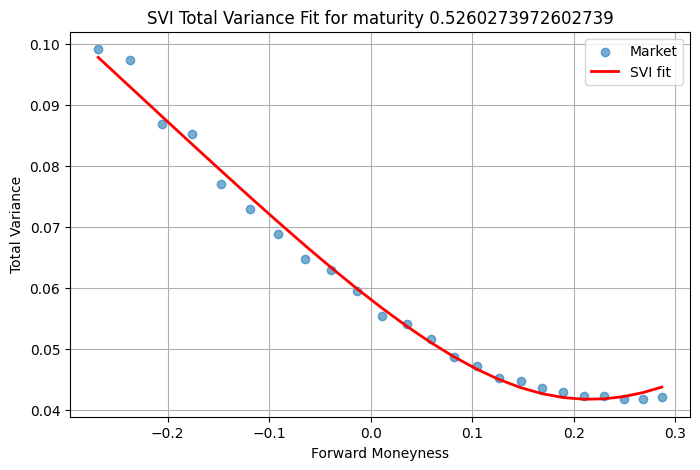

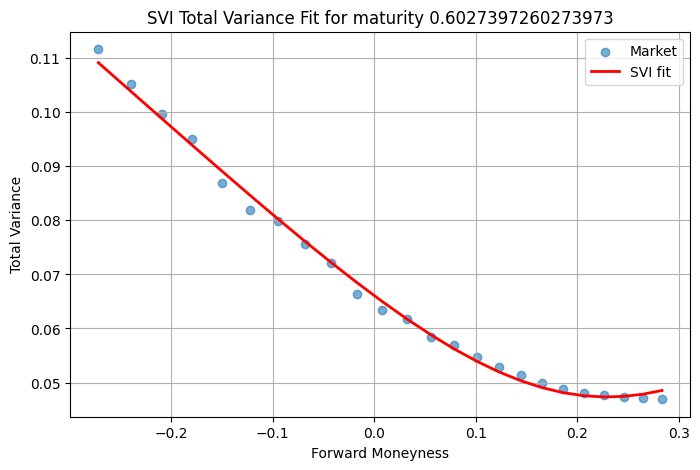

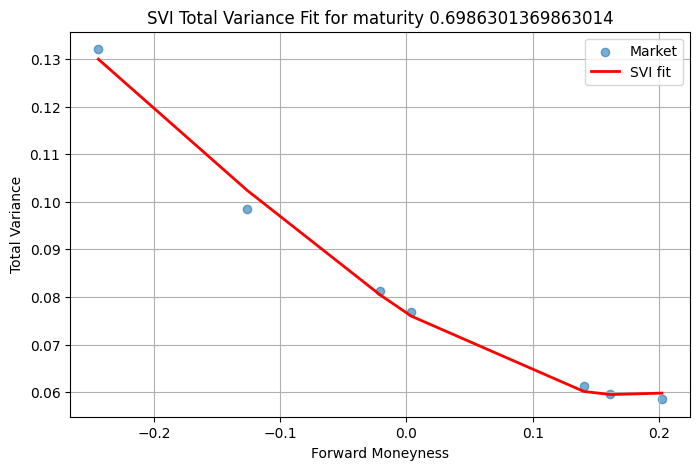

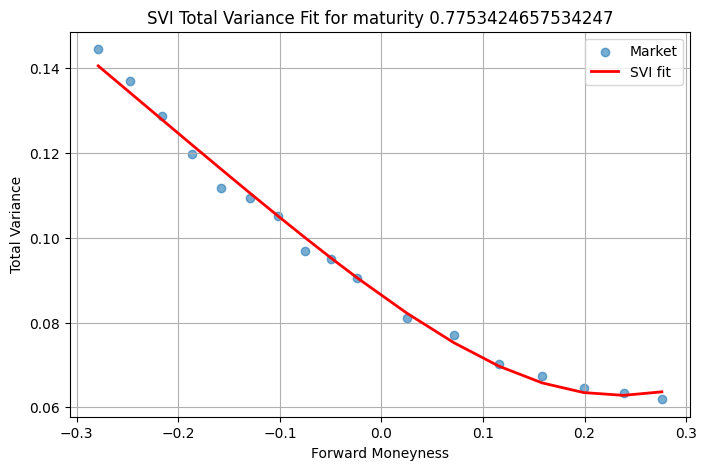

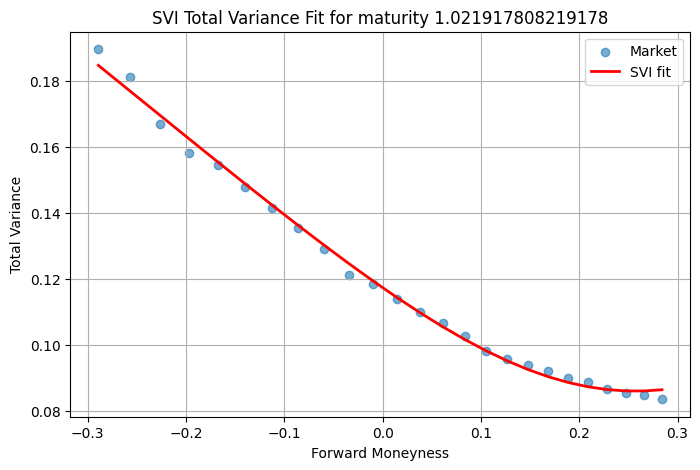

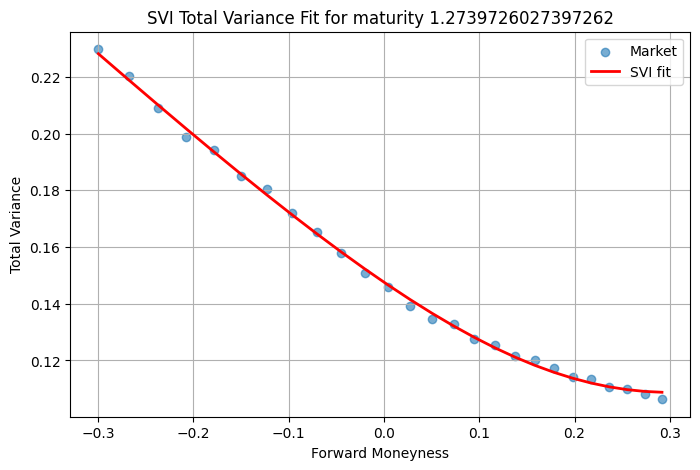

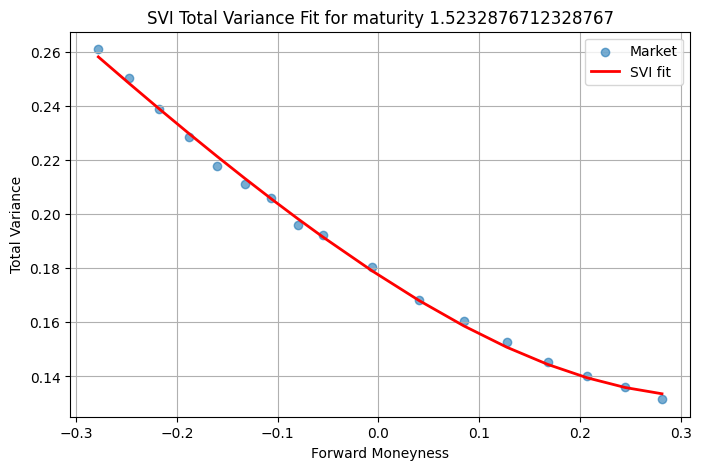

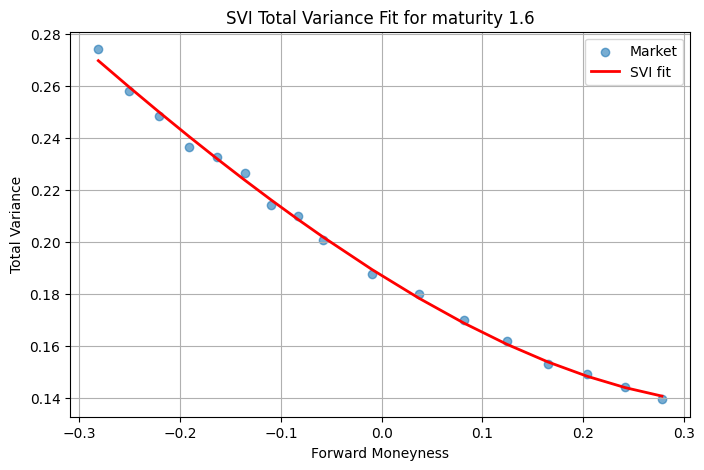

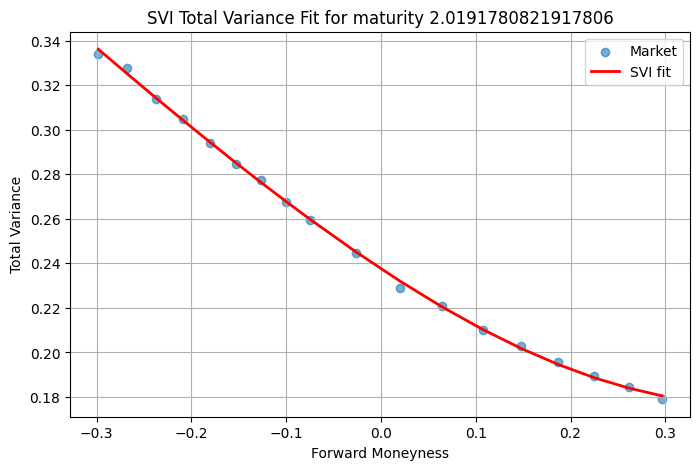

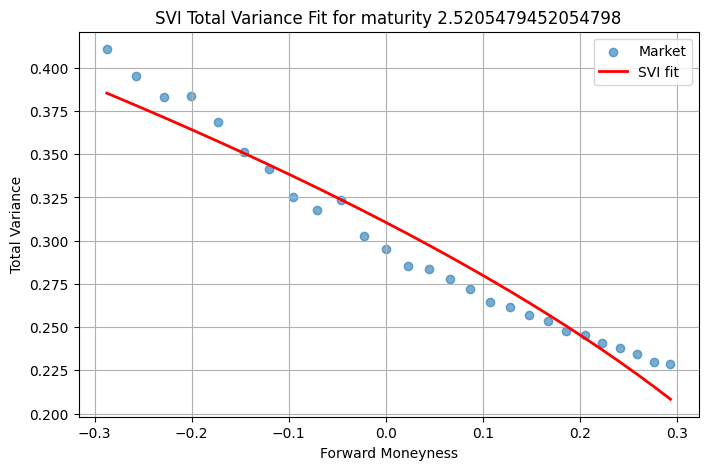

In [17]:
from svioptimizer import SVI
from enums import SVIParameterizationType

maturities = sorted(set(calls[calls["maturity"] >= 0.5]["maturity"]))

for target_maturity in maturities:

    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    svimodel = SVI(SVIParameterizationType.RAW, [0.01, 0.01, 0.01, 0.01, 0.01])

    svimodel.optimize(filtered_calls["forwardMoneyness"].values, filtered_calls["totalVariance"].values)

    x = filtered_calls["forwardMoneyness"].values
    y = filtered_calls["totalVariance"].values
    y_fit = svimodel.evaluate(x)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Market", alpha=0.6)
    plt.plot(x, y_fit, color="red", label="SVI fit", linewidth=2)
    plt.xlabel("Forward Moneyness")
    plt.ylabel("Total Variance")
    plt.title(f"SVI Total Variance Fit for maturity {target_maturity}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
import pandas as pd
surface = calls.pivot(index="forwardMoneyness", columns="maturity", values="impliedVolatility")

In [ ]:
from vola_surface import VolatilitySurface

strikes = [90, 100, 110, 120]
maturities = [0.25, 0.5, 1.0]
vol_matrix = [
    [0.30, 0.28, 0.25],
    [0.25, 0.23, 0.21],
    [0.28, 0.26, 0.24],
    [0.31, 0.29, 0.27],
]

vol_surface = VolatilitySurface(strikes, maturities, vol_matrix)

vol_surface.plot_surface()

<IPython.core.display.Javascript object>